In [221]:
!pip install pandas-profiling xgboost gradio


In [222]:
!pip install --upgrade pandas

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [224]:
!wget https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip

--2024-05-20 13:32:47--  https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/main/Loan_Prediction.zip [following]
--2024-05-20 13:32:47--  https://raw.githubusercontent.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/main/Loan_Prediction.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1627991 (1.6M) [application/zip]
Saving to: ‘Loan_Prediction.zip.2’

Loan_Prediction.zip 100%[===================>]   1.55M  -

In [225]:
!unzip /content/Loan_Prediction.zip

Archive:  /content/Loan_Prediction.zip
replace SampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Demographic data (traindemographics.csv)

In [226]:
train_demo = pd.read_csv("/content/traindemographics.csv")
train_demo.head()

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858efd5ca70688015cabd1f1e94b55  1991-07-19 00:00:00.000000   
4  8a858e785acd3412015acd48f4920d04  1982-11-22 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       3.362850      6.642485           GT Bank   
4           Savings       8.455332     11.971410           GT Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN  
1                 NaN                 Permanent                        NaN  
2                 NaN                       NaN                        NaN  
3                 NaN                 Permanent                        NaN  
4                 NaN                 Permanent                        NaN

In [227]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [228]:
train_demo[train_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

customerid                   birthdate  \
1414  8a858e625c8d993a015c938f829f77ee  1988-12-20 00:00:00.000000   
1928  8a858e625c8d993a015c938f829f77ee  1988-12-20 00:00:00.000000   
445   8a858e6c5c88d145015c8b9627cd5a48  1979-09-30 00:00:00.000000   
1090  8a858e6c5c88d145015c8b9627cd5a48  1979-09-30 00:00:00.000000   
1996  8a858ec65cc6352b015cc64525ea0763  1985-01-30 00:00:00.000000   
1520  8a858ec65cc6352b015cc64525ea0763  1985-01-30 00:00:00.000000   
272   8a858edd57f790040157ffe9b6ed3fbb  1988-01-18 00:00:00.000000   
517   8a858edd57f790040157ffe9b6ed3fbb  1988-01-18 00:00:00.000000   
4126  8a858f1e5baffcc9015bb02b505f180d  1983-04-06 00:00:00.000000   
3021  8a858f1e5baffcc9015bb02b505f180d  1983-04-06 00:00:00.000000   
4115  8a858f1e5cc4bc81015cc548e1eb5206  1979-09-15 00:00:00.000000   
4266  8a858f1e5cc4bc81015cc548e1eb5206  1979-09-15 00:00:00.000000   
750   8a858f965bb63a25015bbf63fd062e2e  1974-02-25 00:00:00.000000   
776   8a858f965bb63a25015bbf63fd062e2e  1974-02-25 00:00:00.000000   
4286  8a858f9f5679951a01567a5b90644817  1984-12-17 00:00:00.000000   
3546  8a858f9f5679951a01567a5b90644817  1984-12-17 00:00:00.000000   
1188  8a858fc75cd62882015cdaf2f4311b3f  1975-10-27 00:00:00.000000   
798   8a858fc75cd62882015cdaf2f4311b3f  1975-10-27 00:00:00.000000   
159   8a858fca5c35df2c015c39ad8695343e  1980-11-26 00:00:00.000000   
138   8a858fca5c35df2c015c39ad8695343e  1980-11-26 00:00:00.000000   
1338  8a858fe05d421ff4015d4c87d2a21ceb  1983-01-20 00:00:00.000000   
1480  8a858fe05d421ff4015d4c87d2a21ceb  1983-01-20 00:00:00.000000   
1015  8a858fe65675195a015679452588279c  1982-08-01 00:00:00.000000   
1010  8a858fe65675195a015679452588279c  1982-08-01 00:00:00.000000   

     bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
1414           Savings       5.768333      5.561992        First Bank   
1928           Savings       5.768333      5.561992        First Bank   
445            Savings       3.367008      6.497313     Sterling Bank   
1090           Savings       3.367008      6.497313     Sterling Bank   
1996           Savings       3.845728      7.411737           GT Bank   
1520           Savings       3.845728      7.411737           GT Bank   
272              Other       3.782563      7.171356        First Bank   
517              Other       3.782563      7.171356        First Bank   
4126           Savings       6.969350      4.818535           GT Bank   
3021           Savings       6.969350      4.818535           GT Bank   
4115           Savings       6.285242      4.922719               UBA   
4266           Savings       6.285242      4.922719               UBA   
750            Savings       3.936366      6.817958      Stanbic IBTC   
776            Savings       3.936366      6.817958      Stanbic IBTC   
4286           Savings       4.196662     12.429509       Access Bank   
3546           Savings       4.196662     12.429509       Access Bank   
1188           Savings       7.437607      9.088935           GT Bank   
798            Savings       7.437607      9.088935           GT Bank   
159            Savings       3.352588      7.211089           GT Bank   
138            Savings       3.352588      7.211089           GT Bank   
1338           Savings       8.526960     12.023015         Skye Bank   
1480           Savings       8.526960     12.023015         Skye Bank   
1015           Savings       7.533646      9.046885               UBA   
1010           Savings       7.533646      9.046885               UBA   

     bank_branch_clients employment_status_clients level_of_education_clients  
1414                 NaN                 Permanent                        NaN  
1928                 NaN                 Permanent                        NaN  
445                  NaN                 Permanent                        NaN  
1090                 NaN                 Permanent                        NaN  
1996                 NaN                 Permanent 

In [229]:
train_demo = train_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [230]:
train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])
train_demo['birth_year'] = train_demo['birthdate'].dt.year
train_demo['birth_month'] = train_demo['birthdate'].dt.month
train_demo['birth_day'] = train_demo['birthdate'].dt.day

<ipython-input-230-7e4afb839206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])
<ipython-input-230-7e4afb839206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo['birth_year'] = train_demo['birthdate'].dt.year
<ipython-input-230-7e4afb839206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [231]:
train_demo['bank_account_type'].value_counts()

bank_account_type
Savings    3414
Other       864
Current      56
Name: count, dtype: int64

In [232]:
encoder = LabelEncoder()
train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])
train_demo[['bank_account_type']]

<ipython-input-232-e918fc1b8ec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])


bank_account_type
0                     2
1                     2
2                     2
3                     2
4                     2
...                 ...
4341                  1
4342                  2
4343                  2
4344                  2
4345                  2

[4334 rows x 1 columns]

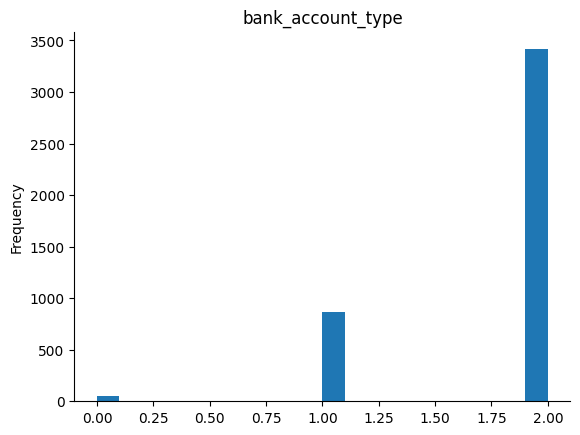

In [233]:

train_demo['bank_account_type'].plot(kind='hist', bins=20, title='bank_account_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Based off of the graph. We can see that Savings is represented by '2', Other is represented by '1' and Current is represented by 0

In [234]:
train_demo['longitude_gps'].describe()


count    4334.000000
mean        4.624000
std         7.194031
min      -118.247009
25%         3.354857
50%         3.591668
75%         6.543691
max       151.209290
Name: longitude_gps, dtype: float64

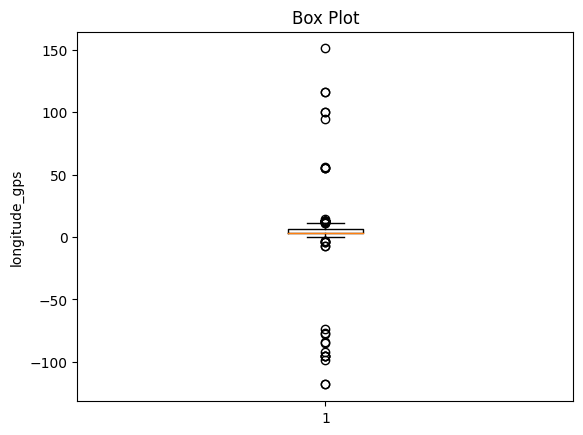

In [235]:
train_demo['longitude_gps'] = train_demo['longitude_gps'].astype(float)
plt.boxplot(train_demo['longitude_gps'])
plt.title('Box Plot')
plt.ylabel('longitude_gps')
plt.show()

The Box plot shows the column has many outliers and they can be replaced with zero

In [236]:
train_demo["longitude_gps"] = train_demo["longitude_gps"] \
                                .where(train_demo["longitude_gps"] < 20)\
                                .where(train_demo["longitude_gps"] > -20)

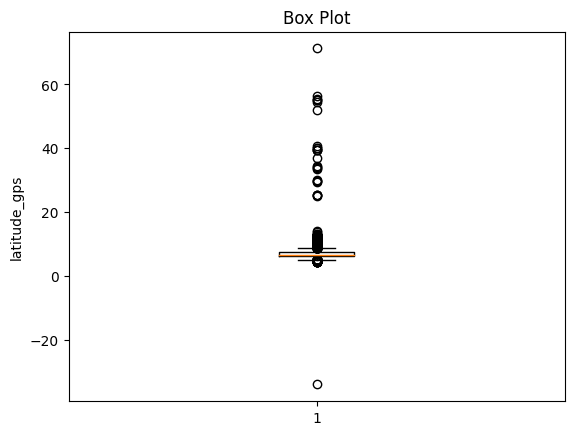

In [237]:
train_demo['latitude_gps'] = train_demo['latitude_gps'].astype(float)
plt.boxplot(train_demo['latitude_gps'])
plt.title('Box Plot')
plt.ylabel('latitude_gps')
plt.show()

In [238]:
train_demo["latitude_gps"] = train_demo["latitude_gps"] \
                                .where(train_demo["latitude_gps"] < 20)\
                                .where(train_demo["latitude_gps"] > -20)

In [239]:
train_demo["bank_name_clients"].value_counts()

bank_name_clients
GT Bank               1594
First Bank             588
Access Bank            431
UBA                    351
Zenith Bank            301
Diamond Bank           282
EcoBank                150
Stanbic IBTC           144
FCMB                   121
Fidelity Bank          103
Skye Bank              101
Sterling Bank           54
Wema Bank               28
Union Bank              23
Heritage Bank           22
Keystone Bank           19
Standard Chartered      15
Unity Bank               7
Name: count, dtype: int64

In [240]:
encoder = LabelEncoder()
train_demo['bank_name_clients'] = encoder.fit_transform(train_demo['bank_name_clients'])
train_demo[['bank_name_clients']]

bank_name_clients
0                     6
1                    12
2                     4
3                     6
4                     6
...                 ...
4341                 10
4342                  6
4343                  6
4344                  6
4345                 13

[4334 rows x 1 columns]

In [241]:
train_demo['bank_branch_clients'].info()

<class 'pandas.core.series.Series'>
Index: 4334 entries, 0 to 4345
Series name: bank_branch_clients
Non-Null Count  Dtype 
--------------  ----- 
51 non-null     object
dtypes: object(1)
memory usage: 67.7+ KB


In [242]:
train_demo.drop(columns=['bank_branch_clients'], inplace=True)

In [243]:
train_demo['employment_status_clients'].isnull().value_counts()

employment_status_clients
False    3686
True      648
Name: count, dtype: int64

There are 648 null values however dropping them will get rid of important data. The null values can be replaced by "Unknown"

In [244]:
train_demo["employment_status_clients"]= train_demo["employment_status_clients"].fillna("Unknown")
train_demo["employment_status_clients"].value_counts()

employment_status_clients
Permanent        3134
Unknown           648
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

In [245]:
train_demo["level_of_education_clients"].isnull().value_counts()

level_of_education_clients
True     3748
False     586
Name: count, dtype: int64

In [246]:
train_demo["level_of_education_clients"]= train_demo["level_of_education_clients"].fillna("Unknown")
train_demo["level_of_education_clients"].value_counts()

level_of_education_clients
Unknown          3748
Graduate          420
Secondary          88
Post-Graduate      68
Primary            10
Name: count, dtype: int64

In [247]:
demo_report = ProfileReport(train_demo)
demo_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Performance data (trainperf.csv)

This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer

In [248]:
train_perf = pd.read_csv('/content/trainperf.csv')
train_perf.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [249]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [250]:
train_perf['customerid'].duplicated().sum()

0

In [251]:
train_perf['approveddate'] = pd.to_datetime(train_perf['approveddate'])

train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate             object
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

In [252]:
train_perf['creationdate'] = pd.to_datetime(train_perf['creationdate'])
train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

referredby column has null values and will need to be cleaned

In [253]:
train_perf['referredby'].isnull().value_counts()

referredby
True     3781
False     587
Name: count, dtype: int64

In [254]:
train_perf["referredby"]= train_perf["referredby"].fillna("Unknown")
train_perf["referredby"].value_counts()

referredby
Unknown                             3781
8a858fc55b2548dd015b286e452c678c       8
8a858f965bb63a25015bc2ddf2577416       3
8a858eeb5bb559d3015bb57fa13f10de       3
8a858e125b391784015b395fa56243e6       3
                                    ... 
8a858e3d5c3b5122015c43f776bd4a3a       1
8a858f7a5b39a003015b39ca67ab2efb       1
8a858fa359d61dae0159d698bf503d29       1
8a858e6f5cd5e874015ce084c86e2a87       1
8a858eda5c8863ff015c9dead65807bb       1
Name: count, Length: 522, dtype: int64

In [255]:
train_perf["good_bad_flag"].value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

In [256]:
encoder = LabelEncoder()
train_perf['good_bad_flag'] = encoder.fit_transform(train_perf['good_bad_flag'])
train_perf[['good_bad_flag']]

good_bad_flag
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
4363              0
4364              0
4365              0
4366              0
4367              0

[4368 rows x 1 columns]

In [257]:
train_perf.head(5)

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18     15000.0   17250.0        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51     20000.0   22250.0        15   
3 2017-07-27 19:00:41 2017-07-27 18:00:35     10000.0   11500.0        15   
4 2017-07-03 23:42:45 2017-07-03 22:42:39     40000.0   44000.0        30   

  referredby  good_bad_flag  
0    Unknown              1  
1    Unknown              1  
2    Unknown              1  
3    Unknown              1  
4    Unknown              1

In [ ]:
performance_report = ProfileReport(train_perf)
performance_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# Previous loans data (trainprevloans.csv)

This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

In [ ]:
train_prevloans = pd.read_csv('/content/trainprevloans.csv')
train_prevloans.head(5)

In [ ]:
train_prevloans.info()

In [ ]:
train_prevloans[train_prevloans['customerid'].duplicated(keep=False)].sort_values('customerid')

In [ ]:
train_prevloans = train_prevloans.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
train_prevloans.info()

In [ ]:
train_prevloans['approveddate'] =pd.to_datetime(train_prevloans['approveddate'])
train_prevloans['creationdate'] =pd.to_datetime(train_prevloans['creationdate'])
train_prevloans['firstduedate'] =pd.to_datetime(train_prevloans['firstduedate'])
train_prevloans['firstrepaiddate'] =pd.to_datetime(train_prevloans['firstrepaiddate'])
train_prevloans['closeddate'] =pd.to_datetime(train_prevloans['closeddate'])
train_prevloans.dtypes

In [ ]:
train_prevloans['referredby'].isnull().value_counts()

In [ ]:
train_prevloans["referredby"]= train_prevloans["referredby"].fillna("Unknown")
train_prevloans["referredby"].value_counts()

In [ ]:
prevloan_report = ProfileReport(train_prevloans)
prevloan_report

# It would be wise to merge the CSV files since each contains relevant information for loan prediction.

In [ ]:
merged_train_data = train_demo.merge(train_perf, on='customerid')
merged_train_data.info()

In [ ]:
merged_train_data.columns

In [ ]:
merged_train_data.duplicated().sum()


In [ ]:
merged_train_data = merged_train_data.merge(train_prevloans, on='customerid')
merged_train_data.columns

In [ ]:
merged_train_data['approveddate_x'] = pd.to_datetime(merged_train_data['approveddate_x'])

merged_train_data['creationdate_x'] = pd.to_datetime(merged_train_data['creationdate_x'])

merged_train_data['approveddate_x_year'] = merged_train_data['approveddate_x'].dt.year
merged_train_data['approveddate_x_month'] = merged_train_data['approveddate_x'].dt.month
merged_train_data['approveddate_x_day'] = merged_train_data['approveddate_x'].dt.day

merged_train_data['creationdate_x'] = merged_train_data['creationdate_x'].dt.year

merged_train_data['approveddate_y'] = pd.to_datetime(merged_train_data['approveddate_y'])
merged_train_data['approveddate_y'] = merged_train_data['approveddate_y'].dt.year

merged_train_data['creationdate_y'] = pd.to_datetime(merged_train_data['creationdate_y'])
merged_train_data['creationdate_y'] = merged_train_data['creationdate_y'].dt.year

merged_train_data['closeddate'] = pd.to_datetime(merged_train_data['closeddate'])
merged_train_data['closeddate'] = merged_train_data['closeddate'].dt.year

merged_train_data['firstduedate'] = pd.to_datetime(merged_train_data['firstduedate'])
merged_train_data['firstduedate'] = merged_train_data['firstduedate'].dt.year

merged_train_data['firstrepaiddate'] = pd.to_datetime(merged_train_data['firstrepaiddate'])
merged_train_data['firstrepaiddate'] = merged_train_data['firstrepaiddate'].dt.year


In [ ]:
merged_train_data.info()

In [ ]:
merged_train_data.drop(columns=["birthdate", "approveddate_x"])

In [ ]:
merged_train_data.head()

# Merge the test data

In [ ]:
test_demo = pd.read_csv("/content/testdemographics.csv")
test_demo

In [ ]:
test_demo.info()

In [ ]:
test_demo[test_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

In [ ]:
test_demo = test_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
test_demo['birthdate'] = pd.to_datetime(test_demo['birthdate'])

In [ ]:
test_demo['bank_account_type'].value_counts()

In [ ]:
encoder = LabelEncoder()
train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])
train_demo[['bank_account_type']]

In [ ]:
test_demo['longitude_gps'].describe()

In [ ]:
test_demo['longitude_gps'] = test_demo['longitude_gps'].astype(float)
plt.boxplot(test_demo['longitude_gps'])
plt.title('Box Plot')
plt.ylabel('longitude_gps')
plt.show()

In [ ]:
test_demo["longitude_gps"] = test_demo["longitude_gps"] \
                                .where(test_demo["longitude_gps"] < 20)\
                                .where(test_demo["longitude_gps"] > -20)

In [ ]:
test_demo['latitude_gps'].describe()

In [ ]:
test_demo['latitude_gps'] = test_demo['latitude_gps'].astype(float)
plt.boxplot(test_demo['latitude_gps'])
plt.title('Box Plot')
plt.ylabel('latitude_gps')
plt.show()

In [ ]:
test_demo["latitude_gps"] = test_demo["latitude_gps"] \
                                .where(test_demo["latitude_gps"] < 20)\
                                .where(test_demo["latitude_gps"] > -20)

In [ ]:
test_demo.drop(columns=['bank_branch_clients'], inplace=True)

In [ ]:
test_demo['employment_status_clients'].isnull().value_counts()

In [ ]:
test_demo["employment_status_clients"]= test_demo["employment_status_clients"].fillna("Unknown")
test_demo["employment_status_clients"].value_counts()

In [ ]:
test_demo["level_of_education_clients"].isnull().value_counts()

In [ ]:
test_demo["level_of_education_clients"]= test_demo["level_of_education_clients"].fillna("Unknown")
test_demo["level_of_education_clients"].value_counts()

In [ ]:
demo_report2 = ProfileReport(test_demo)
demo_report

In [ ]:
test_prevloans = pd.read_csv("/content/testprevloans.csv")
test_prevloans

In [ ]:
test_prevloans.info()

In [ ]:
test_prevloans[test_prevloans['customerid'].duplicated(keep=False)].sort_values('customerid')

In [ ]:
test_prevloans = test_prevloans.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
test_prevloans['approveddate'] =pd.to_datetime(test_prevloans['approveddate'])
test_prevloans['creationdate'] =pd.to_datetime(test_prevloans['creationdate'])
test_prevloans['firstduedate'] =pd.to_datetime(test_prevloans['firstduedate'])
test_prevloans['firstrepaiddate'] =pd.to_datetime(test_prevloans['firstrepaiddate'])
test_prevloans['closeddate'] =pd.to_datetime(test_prevloans['closeddate'])


In [ ]:
test_prevloans['referredby'].isnull().value_counts()

In [ ]:
test_prevloans["referredby"]= test_prevloans["referredby"].fillna("Unknown")
test_prevloans["referredby"].value_counts()

In [ ]:
prevloan_report2 = ProfileReport(test_prevloans)
prevloan_report2

In [ ]:
test_perf = pd.read_csv("/content/testperf.csv")
test_perf.head()

In [ ]:
test_perf.info()

In [ ]:
test_perf['customerid'].duplicated().sum()

In [ ]:
test_perf["referredby"]= test_perf["referredby"].fillna("Unknown")
test_perf["referredby"].value_counts()

In [ ]:
merged_test_data = test_demo.merge(test_perf, on='customerid')
merged_test_data.info()

In [ ]:
merged_test_data = merged_test_data.merge(test_prevloans, on='customerid')
merged_test_data.info()

In [ ]:
merged_test_data.duplicated().sum()

# Separate features and target variable in the training dataset

In [ ]:
X_train = merged_train_data.drop(columns=["good_bad_flag", "customerid"])
y_train = merged_train_data["good_bad_flag"]

X_test = merged_test_data.drop(columns=["customerid"])



In [ ]:
X_train.info()

In [314]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3264 entries, 0 to 3263
Series name: good_bad_flag
Non-Null Count  Dtype
--------------  -----
3264 non-null   int64
dtypes: int64(1)
memory usage: 25.6 KB


# 1. Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
#train_prevloans['loanstatus'] = (train_prevloans['totaldue'] - train_prevloans['loanamount']).apply(lambda x: 1 if x >= 0 else 0)
#train_prevloans = train_prevloans.drop(['customerid', 'systemloanid', 'approveddate', 'creationdate', 'closeddate', 'referredby',
 #             'firstduedate', 'firstrepaiddate', 'loanamount', 'totaldue'], axis=1)

#train_prevloans.loc[:,"loanstatus"]


In [ ]:
#test_prevloans = pd.read_csv('/content/testprevloans.csv')
#test_prevloans = test_prevloans.drop_duplicates (subset='customerid', keep='first', inplace=False)
#test_prevloans.info()

In [ ]:
#x_test = test_prevloans.drop('loanstatus', axis=1)
#y_test= test_prevloans['loanstatus']
#model.fit(x_train, y_train)
#y_predict=model.predict(x_test)
#accuracy = accuracy_score(y_test, y_predict)
#print(f'Accuracy: {accuracy}')

#print(classification_report(y_test, y_predict))


In [ ]:
#x_train = train_prevloans.drop('loanstatus', axis=1)
#y_train = train_prevloans['loanstatus']

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#model = DecisionTreeClassifier(random_state=42)